In [40]:
import numpy as np # library to handle data in a vectorized manner
import math
import re

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sb
from matplotlib import pyplot as plt


from sklearn import linear_model

#!conda install folium -c conda-forge
import folium

<h1>Here the data analysis is performed</h1>
<h3>View the notebooks below for code relating to obtaining the data</h3>
<p><a href="https://github.com/zeteotheos/ibmc/blob/master/GetFoursquareData.ipynb">Get Foursquare data Notebook</a></p>
<p><a href="https://github.com/zeteotheos/ibmc/blob/master/getIncomeData.ipynb">Get income data Notebook</a></p>

In [10]:
venues=pd.read_csv('allCitiesFourSquare.csv')
cities=pd.read_csv('20kup.csv')
cities.head()

,NAME,STNAME,POPESTIMATE2017,NAME2,latMin,latMax,longMin,longMax,aveIncome
0,Anderson city,Indiana,55076,Anderson,40.019435,40.159155,-85.763144,-85.600990,18366
1,Bloomington city,Indiana,85071,Bloomington,39.121329,39.221362,-86.591894,-86.471131,19600
2,Brownsburg town,Indiana,25911,Brownsburg,39.804108,39.879354,-86.439630,-86.362872,31964
3,Carmel city,Indiana,92198,Carmel,39.926066,40.000597,-86.241071,-86.023519,52207
4,Clarksville town,Indiana,21694,Clarksville,38.268051,38.385638,-85.797211,-85.744804,21602


<h1>Create dataframe with city, population, average Income, and number of venues</h1>

In [21]:
cityVenueCount=[]
for city in cities['NAME2']:
    venueCount=venues[venues['City']==city].shape[0]
    population=int(cities[cities['NAME2']==city]['POPESTIMATE2017'])
    income=int(cities[cities['NAME2']==city]['aveIncome'])
    cityVenueCount.append([city,population,income,venueCount])

venueCountDf=pd.DataFrame(cityVenueCount,columns=['city','population','aveIncome','numberVenues'])

<h1>Plot correlation between city population and number of venues</h1>

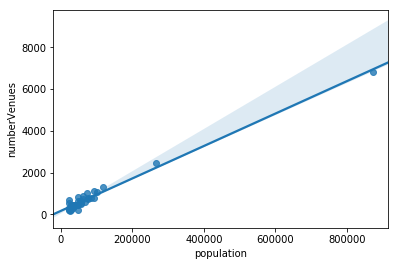

In [12]:

sb.regplot(x = "population", y = "numberVenues", data = venueCountDf)
plt.show()

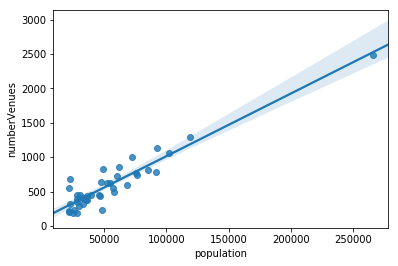

In [13]:
venueCountMinusIndy=pd.DataFrame(venueCountDf[venueCountDf['population']<800000])


sb.regplot(x = "population", y = "numberVenues", data = venueCountMinusIndy)
plt.show()

In [14]:

x=venueCountMinusIndy['population']
y=venueCountMinusIndy['numberVenues']

#y=m*x+b  a=[m,b]
a = np.polyfit(x, y, 1)

a

array([9.10934805e-03, 1.02311408e+02])

In [15]:
x=venueCountDf['population']
y=venueCountDf['numberVenues']

#y=m*x+b  a=[m,b]
a = np.polyfit(x, y, 1)

a

array([7.76019854e-03, 1.71897420e+02])

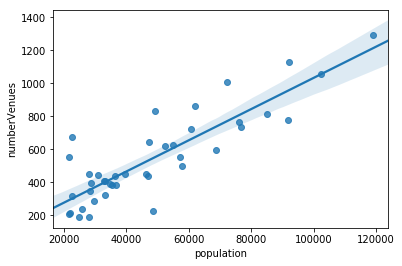

array([9.47194982e-03, 8.57322699e+01])

In [16]:
venueCountUnder200k=venueCountMinusIndy=pd.DataFrame(venueCountDf[venueCountDf['population']<200000])

x=venueCountUnder200k['population']
y=venueCountUnder200k['numberVenues']

sb.regplot(x = "population", y = "numberVenues", data = venueCountMinusIndy)
plt.show()

#y=m*x+b  a=[m,b]
a = np.polyfit(x, y, 1)

a

<h1>Linear regression of Income to total number of venues</h1>

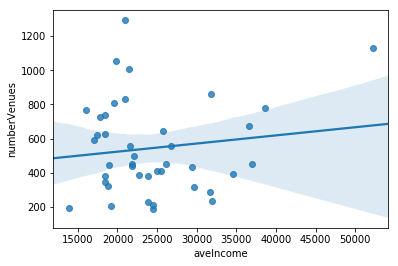

array([4.77029238e-03, 4.27744647e+02])

In [32]:
venueCountUnder200k=venueCountMinusIndy=pd.DataFrame(venueCountDf[venueCountDf['population']<200000])

x=venueCountUnder200k['aveIncome']
y=venueCountUnder200k['numberVenues']

sb.regplot(x = "aveIncome", y = "numberVenues", data = venueCountMinusIndy)
plt.show()

#y=m*x+b  a=[m,b]
a = np.polyfit(x, y, 1)

a

<h1>Multiple Linear Regression of Income and population to number of venues</h1>

In [50]:
x=venueCountUnder200k.loc[:,['aveIncome','population']]
y=venueCountUnder200k.loc[:,'numberVenues']
lm = linear_model.LinearRegression()
lm.fit(x,y)
incomeCoef=lm.coef_[0]
populationCoef=lm.coef_[1]
b=lm.intercept_

<h1>Find cities most under this trendline </h1>

In [56]:
venueCountUnder200k['deltaModel']=venueCountUnder200k['numberVenues']-lm.predict(x)
    

In [60]:
venueCountUnder200k.sort_values('deltaModel',ascending=True).head(10)

,city,population,aveIncome,numberVenues,predictedVenues,deltaModel
25,Lawrence,48704,23801,226,544.333339,-318.333339
10,Fishers,91832,38600,777,1008.452024,-231.452024
12,Franklin,25089,24471,189,324.063321,-135.063321
2,Brownsburg,25911,31964,235,360.740251,-125.740251
22,Kokomo,57836,22102,499,623.955084,-124.955084
7,East Chicago,28215,13868,192,312.640633,-120.640633
5,Columbus,47143,29396,435,551.196338,-116.196338
30,Muncie,68625,16986,593,706.025907,-113.025907
6,Crown Point,29625,31673,289,394.666321,-105.666321
15,Greenfield,22094,24458,212,295.749183,-83.749183


<h1>Find Most Underrepresented Categories</h1>


In [177]:
a=list(set(venues['Category']))
df=pd.DataFrame(a)

In [178]:
df.columns=['Category']

In [179]:
len(set(venues[venues['Category']=='Fast Food Restaurant']['City']))

43

In [180]:
for index,row in df.iterrows():
    df.loc[index,'count']=venues[venues['Category']==row['Category']].shape[0]
    df.loc[index,'numberCities']=len(set(venues[venues['Category']==row['Category']]['City']))

In [183]:
df.sort_values('numberCities',ascending=True).head(200)

,Category,count,numberCities
518,Cave,2.0,1.0
375,Grilled Meat Restaurant,1.0,1.0
376,Syrian Restaurant,1.0,1.0
381,Theme Restaurant,1.0,1.0
382,Credit Union,1.0,1.0
161,Fountain,2.0,1.0
385,Pastry Shop,1.0,1.0
158,Toll Booth,1.0,1.0
152,Summer Camp,2.0,1.0
151,College Stadium,1.0,1.0


In [92]:
categoryDf43=pd.DataFrame(df[df['numberCities']==43])
categoryDf43.head()

,Category,count,numberCities
13,Mexican Restaurant,663.0,43.0
27,Fast Food Restaurant,1242.0,43.0
39,Chinese Restaurant,384.0,43.0
49,Liquor Store,409.0,43.0
92,Pizza Place,1194.0,43.0


In [99]:
venues[(venues['City']=='Columbus')&(venues['Category']=='Mexican Restaurant')].shape[0]

8

In [110]:
for category in categoryDf43['Category']:
    for index,row in venueCountUnder200k.iterrows():    
        city=row['city']
        venueCount=venues[(venues['City']==city)&(venues['Category']==category)].shape[0]
        venueCountUnder200k.loc[index,category]=venueCount
    
    x=venueCountUnder200k.loc[:,['aveIncome','population']]
    y=venueCountUnder200k.loc[:,category]
    lm = linear_model.LinearRegression()
    lm.fit(x,y)
    columnName="deltaModel "+category
    venueCountUnder200k[columnName]=venueCountUnder200k[category]-lm.predict(x)

In [113]:
venueCountUnder200k.head()

,city,population,aveIncome,numberVenues,predictedVenues,deltaModel,Mexican Restaurant,deltaModel Mexican Restaurant,Fast Food Restaurant,deltaModel Fast Food Restaurant,Chinese Restaurant,deltaModel Chinese Restaurant,Liquor Store,deltaModel Liquor Store,Pizza Place,deltaModel Pizza Place,Bar,deltaModel Bar,Construction & Landscaping,deltaModel Construction & Landscaping,Coffee Shop,deltaModel Coffee Shop,American Restaurant,deltaModel American Restaurant,Discount Store,deltaModel Discount Store,Baseball Field,deltaModel Baseball Field,Video Store,deltaModel Video Store,Golf Course,deltaModel Golf Course,Pharmacy,deltaModel Pharmacy,Grocery Store,deltaModel Grocery Store,Park,deltaModel Park,Sandwich Place,deltaModel Sandwich Place
0,Anderson,55076,18366,624,583.489515,40.510485,15.0,3.208320,28.0,0.750996,11.0,4.236707,7.0,-0.775387,31.0,6.490550,15.0,-0.573709,10.0,2.108309,5.0,-2.853446,28.0,13.129266,14.0,2.794007,11.0,3.833098,9.0,1.723947,7.0,2.895203,7.0,-1.730111,9.0,0.017292,17.0,4.018795,11.0,-3.385141
1,Bloomington,85071,19600,811,871.316510,-60.316510,14.0,-2.245983,26.0,-10.268434,11.0,1.019570,12.0,0.242374,26.0,-9.599556,19.0,-3.250161,7.0,-3.841821,18.0,5.709067,17.0,-4.600008,7.0,-7.633769,3.0,-6.814958,9.0,-0.983689,5.0,-1.936659,11.0,-1.980309,14.0,0.314871,17.0,-1.465532,25.0,3.149488
2,Brownsburg,25911,31964,235,360.740251,-125.740251,5.0,-3.242861,7.0,-3.962523,3.0,-1.583856,3.0,-0.694147,17.0,3.241198,2.0,-3.532639,7.0,-0.904038,4.0,-0.958068,7.0,-3.256685,2.0,-0.220555,9.0,5.750950,2.0,-0.966082,1.0,-3.130301,2.0,-3.023646,1.0,-0.894114,5.0,-5.939788,5.0,-3.130725
3,Carmel,92198,52207,1128,1064.423004,63.576996,24.0,4.987512,19.0,-2.997584,16.0,3.183551,13.0,0.752985,36.0,-2.305779,20.0,3.914150,13.0,-4.833631,19.0,2.555350,34.0,6.588717,2.0,-1.104943,6.0,-1.511316,7.0,0.035559,21.0,7.322012,15.0,0.079301,8.0,-1.307672,27.0,0.044534,29.0,3.182428
4,Clarksville,21694,21602,556,280.951463,275.048537,14.0,6.921944,20.0,5.130223,8.0,4.521618,7.0,3.721682,25.0,12.822788,8.0,0.962222,5.0,-0.505783,4.0,0.643018,15.0,7.017537,10.0,4.369529,4.0,0.198520,9.0,5.259771,2.0,0.181212,12.0,7.867281,6.0,3.034499,13.0,5.097253,15.0,8.610359


In [154]:
df=pd.DataFrame(categoryDf43['Category'])
df['Category']="deltaModel "+df['Category']
a=list(df['Category'])
b=['city']+a

df1=pd.DataFrame(venueCountUnder200k,columns=a)

In [166]:
df1.drop('min',axis=1,inplace=True)

In [169]:
df1.idxmin(axis=1)
df3=pd.DataFrame(venueCountUnder200k['city'])

In [171]:
df3['min']=df1.min(axis=1)

In [173]:
df3['minCategory']=df1.idxmin(axis=1)

In [176]:
df3.sort_values('min')

,city,min,minCategory
41,West Lafayette,-15.634305,deltaModel Fast Food Restaurant
7,East Chicago,-14.895415,deltaModel Fast Food Restaurant
25,Lawrence,-13.439069,deltaModel Fast Food Restaurant
10,Fishers,-12.264502,deltaModel Bar
1,Bloomington,-10.268434,deltaModel Fast Food Restaurant
16,Greenwood,-10.082050,deltaModel Bar
38,South Bend,-8.948254,deltaModel Pizza Place
8,Elkhart,-8.228488,deltaModel Bar
9,Evansville,-8.190686,deltaModel American Restaurant
27,Merrillville,-8.050455,deltaModel Pizza Place
